Matplotlib is building the font cache; this may take a moment.


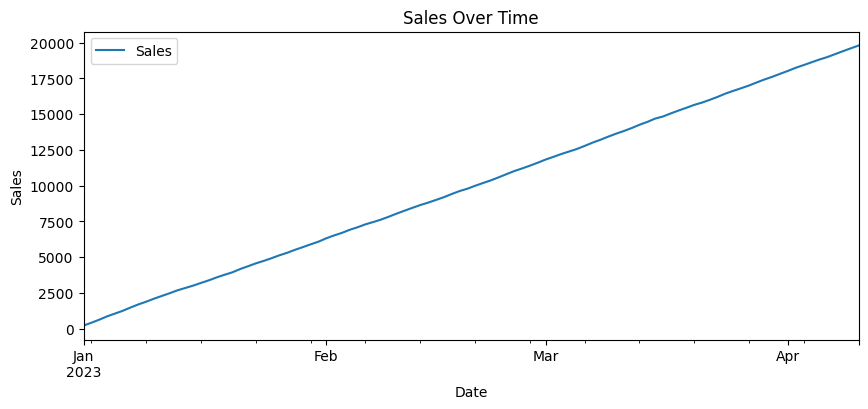

/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -435.443
Date:                Sun, 13 Jul 2025   AIC                            882.886
Time:                        15:27:22   BIC                            898.457
Sample:                    01-01-2023   HQIC                           889.186
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1783      0.109      1.640      0.101      -0.035       0.391
ar.L2          0.1422      0.122      1.164      0.244      -0.097       0.382
ar.L3          0.1598      0.099      1.614      0.1

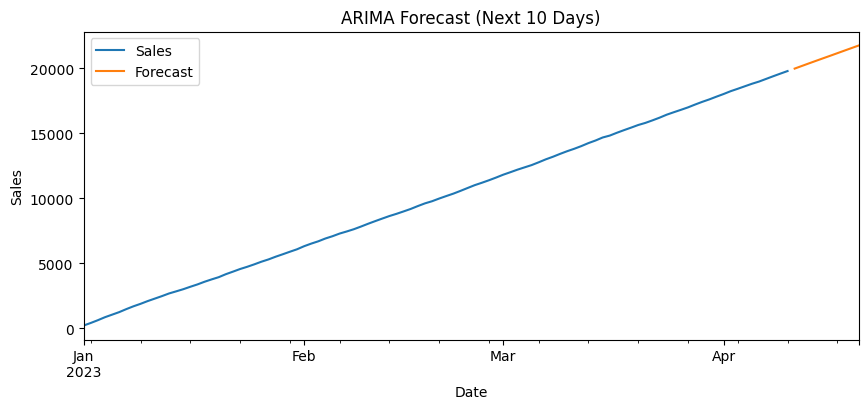

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# 1. Simulate sample daily sales data (or replace with real data)
np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", periods=100, freq='D')
sales = np.random.normal(loc=200, scale=20, size=100).cumsum()
data = pd.DataFrame({'Date': date_range, 'Sales': sales})
data.set_index('Date', inplace=True)

# 2. Plot original time series
data.plot(title='Sales Over Time', figsize=(10, 4))
plt.ylabel('Sales')
plt.show()

# 3. Fit ARIMA model (p=5, d=1, q=0 as an example)
model = ARIMA(data['Sales'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# 4. Forecast next 10 days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# 5. Plot the forecast
future_dates = pd.date_range(data.index[-1] + timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame({'Forecast': forecast}, index=future_dates)

# Combine old + forecast
combined = pd.concat([data, forecast_df])

combined.plot(title='ARIMA Forecast (Next 10 Days)', figsize=(10, 4))
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()
